In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('creditcard1.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data Overview:

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Visualisation:

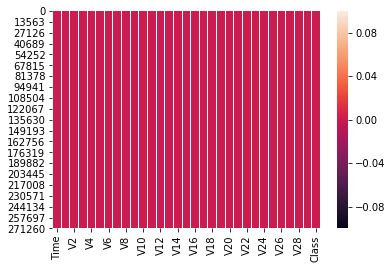

In [9]:
sns.heatmap(df.isnull())

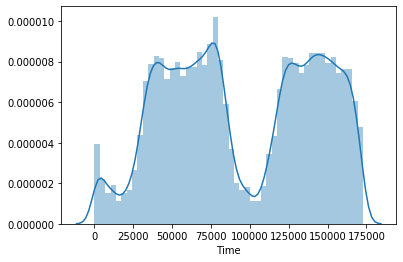

In [10]:
sns.distplot(df['Time'])

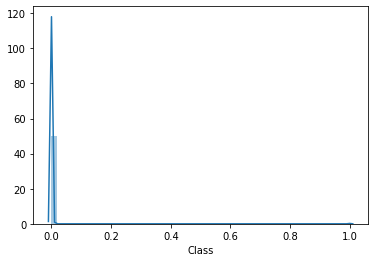

In [11]:
sns.distplot(df['Class'])

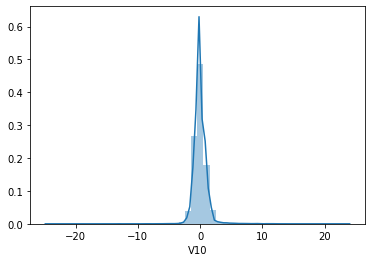

In [12]:
sns.distplot(df['V10'])

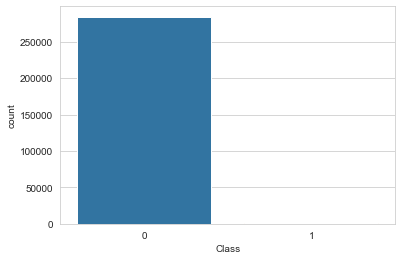

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Class',data=df)

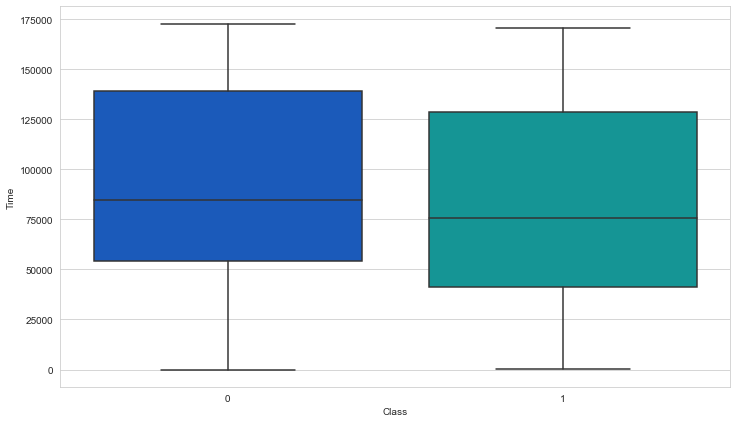

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Class',y='Time',data=df,palette='winter')

In [15]:
#removing outliers:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.99658302, 0.69424232, 0.04407492, ..., 0.06378115, 0.24496426,
        0.04159898],
       [1.99658302, 0.60849633, 0.16117592, ..., 0.04460752, 0.34247454,
        0.04159898],
       [1.99656197, 0.69350046, 0.81157783, ..., 0.18102083, 1.16068593,
        0.04159898],
       ...,
       [1.6419735 , 0.98002374, 0.18243372, ..., 0.0804672 , 0.0818393 ,
        0.04159898],
       [1.6419735 , 0.12275539, 0.32125034, ..., 0.31668678, 0.31324853,
        0.04159898],
       [1.64205773, 0.27233093, 0.11489898, ..., 0.04134999, 0.51435531,
        0.04159898]])

In [16]:
threshold=3
print(np.where(z>3))

(array([     2,      7,      7, ..., 284802, 284802, 284805], dtype=int64), array([16,  8, 28, ..., 10, 14, 19], dtype=int64))


In [18]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


# Training and Testing:

In [21]:
#Dividing x and y
y=df[['Class']]
x=df.drop(['Class'], axis = 1)

In [22]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=52)

In [24]:
x_train.shape

(190820, 30)

In [25]:
x_test.shape

(93987, 30)

In [26]:
y_train.shape

(190820, 1)

In [27]:
y_test.shape

(93987, 1)

# Logistic:

In [28]:
lg=LogisticRegression()

In [29]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
pred=lg.predict(x_test)
print("accuracy_score :",accuracy_score(pred,y_test))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score : 0.9990849798376371
[[93794    20]
 [   66   107]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93814
           1       0.84      0.62      0.71       173

    accuracy                           1.00     93987
   macro avg       0.92      0.81      0.86     93987
weighted avg       1.00      1.00      1.00     93987



In [31]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [32]:
y_pred_prob=lg.predict_proba(x_test)[:,0]
y_pred_prob

array([0.99978219, 0.99998027, 0.99993107, ..., 0.99988764, 0.99952927,
       0.99986243])

In [33]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)

In [34]:
tpr

array([0.00000000e+00, 1.06593899e-05, 7.01387853e-03, 7.03519731e-03,
       1.13309314e-02, 1.13522502e-02, 1.44754514e-02, 1.44967702e-02,
       2.15852645e-02, 2.16279020e-02, 3.41207069e-02, 3.41420257e-02,
       3.46323576e-02, 3.46536764e-02, 3.68281920e-02, 3.68281920e-02,
       3.73185239e-02, 3.73398427e-02, 8.15763106e-02, 8.16402669e-02,
       8.16722451e-02, 8.17362014e-02, 8.28127998e-02, 8.28447780e-02,
       8.28874155e-02, 8.29193937e-02, 8.85475515e-02, 8.85795297e-02,
       9.40477967e-02, 9.40691155e-02, 9.58279148e-02, 9.58492336e-02,
       1.11742384e-01, 1.11774362e-01, 1.11795681e-01, 1.12989532e-01,
       1.13010851e-01, 1.46875733e-01, 1.46897052e-01, 1.52280043e-01,
       1.52322681e-01, 1.78224998e-01, 1.78246317e-01, 1.91900996e-01,
       1.91922314e-01, 2.58426248e-01, 2.58447566e-01, 2.60046475e-01,
       2.60067794e-01, 2.82548447e-01, 2.82569766e-01, 2.85266591e-01,
       2.85287910e-01, 2.89903426e-01, 2.89924745e-01, 3.04410856e-01,
      

In [35]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00578035, 0.00578035, 0.00578035, 0.00578035, 0.00578035,
       0.00578035, 0.00578035, 0.00578035, 0.00578035, 0.00578035,
       0.00578035, 0.00578035, 0.00578035, 0.00578035, 0.00578035,
       0.00578035, 0.00578035, 0.00578035, 0.00578035, 0.00578035,
       0.00578035, 0.00578035, 0.00578035, 0.00578035, 0.00578035,
       0.00578035, 0.00578035, 0.00578035, 0.00578035, 0.00578035,
       0.00578035, 0.00578035, 0.00578035, 0.00578035, 0.00578035,
       0.00578035, 0.00578035, 0.00578035, 0.00578035, 0.00578035,
       0.00578035, 0.00578035, 0.00578035, 0.00578035, 0.00578035,
       0.00578035, 0.00578035, 0.01156069, 0.01156069, 0.01156069,
       0.01156069, 0.01156069, 0.01156069, 0.01156069, 0.01156069,
       0.01156069, 0.01156069, 0.01156069, 0.01156069, 0.01156

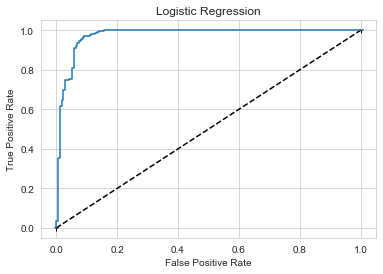

In [37]:
plt.plot([0,1],[0,1],'k--1')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [38]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

0.8091419610147296

# GaussianNB:

In [39]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.9774756083288114
[[91729  2085]
 [   32   141]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     93814
           1       0.06      0.82      0.12       173

    accuracy                           0.98     93987
   macro avg       0.53      0.90      0.55     93987
weighted avg       1.00      0.98      0.99     93987



In [40]:
y_pred_prob=gnb.predict_proba(x_test)[:,0]
y_pred_prob

array([1., 1., 1., ..., 1., 1., 1.])

In [41]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)

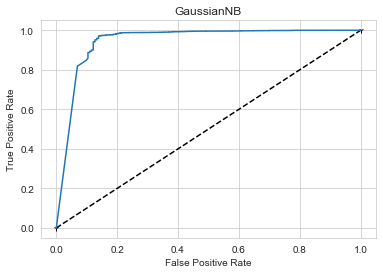

In [42]:
plt.plot([0,1],[0,1],'k--1')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GaussianNB')
plt.show()

In [43]:
auc_score=roc_auc_score(y_test,gnb.predict(x_test))
auc_score

0.8964020369416251

# DecisionTree:

In [44]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9990424207603179
[[93765    49]
 [   41   132]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93814
           1       0.73      0.76      0.75       173

    accuracy                           1.00     93987
   macro avg       0.86      0.88      0.87     93987
weighted avg       1.00      1.00      1.00     93987



In [45]:
y_pred_prob=gnb.predict_proba(x_test)[:,0]
y_pred_prob

array([1., 1., 1., ..., 1., 1., 1.])

In [46]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)

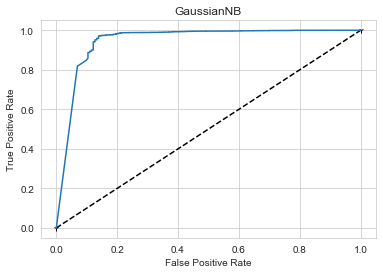

In [47]:
plt.plot([0,1],[0,1],'k--1')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GaussianNB')
plt.show()

In [48]:
auc_score=roc_auc_score(y_test,gnb.predict(x_test))
auc_score

0.8964020369416251

# RandomForest:

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf=RandomForestClassifier(n_estimators=100,random_state=45)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9994254524561907
[[93801    13]
 [   41   132]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93814
           1       0.91      0.76      0.83       173

    accuracy                           1.00     93987
   macro avg       0.95      0.88      0.91     93987
weighted avg       1.00      1.00      1.00     93987



In [51]:
y_pred_prob=gnb.predict_proba(x_test)[:,0]
y_pred_prob

array([1., 1., 1., ..., 1., 1., 1.])

In [52]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)

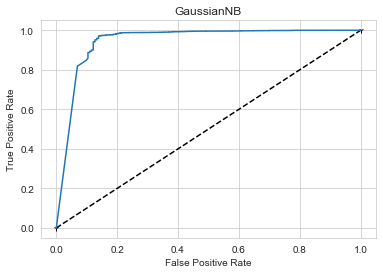

In [53]:
plt.plot([0,1],[0,1],'k--1')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GaussianNB')
plt.show()

In [54]:
auc_score=roc_auc_score(y_test,gnb.predict(x_test))
auc_score

0.8964020369416251